### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.decomposition import TruncatedSVD

In [3]:
amazon_ratings = pd.read_csv("ratings_beauty.csv")
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.shape

(2023070, 4)

In [4]:
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


### We will now list out the most popular products by number of reviews it received

In [5]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_reviewed_Products = popular_products.sort_values('Rating', ascending = False)
most_reviewed_Products.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


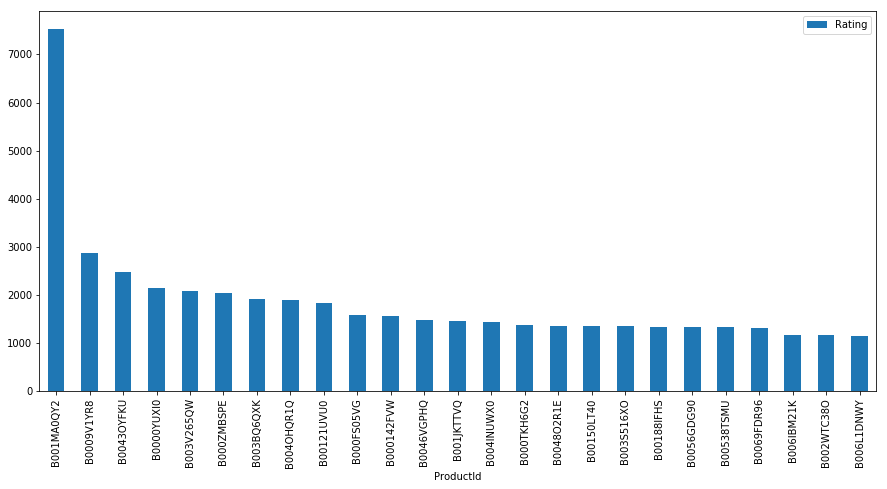

In [12]:
most_reviewed_Products.head(25).plot(kind= 'bar', figsize = (15,7))

### Model-based collaborative filtering system

#### Utility Matrix based on products sold and user reviews¶
Utility Matrix

An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [13]:
# Subset of Amazon Ratings  - 30000 samples

amazon_ratings_sample = amazon_ratings.head(30000)

In [15]:
ratings_utility_matrix = amazon_ratings_sample.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0) 
# filled the unknown valeus with Zero
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B00007KH0O,B00007KQF3,B00007KUSE,B00007L1HG,B00007L1HT,B00007L1IE,B00007L64J,B00007LB75,B00007LVDA,B00007M0CP
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01437583CZ7V02UKZQ5S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01907982I6OHXDYN5HD6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A020135981U0UNEAE4JV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
ratings_utility_matrix.shape

(28458, 1858)

In [18]:
# Transpose the Matrix
T_Matrix = ratings_utility_matrix.T
T_Matrix.shape

(1858, 28458)

In [19]:
T_Matrix.head()

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A01907982I6OHXDYN5HD6,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A03900532XT2E5T10WV0U,...,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZSAMMJPJKJ1,AZZTJQ7CQZUD8,AZZVCBG5G4EV8,AZZWPNME0GQZ2
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Decomposing the matrix
SVD = TruncatedSVD(n_components = 20)
decomposed_matrix = SVD.fit_transform(T_Matrix)
decomposed_matrix.shape

(1858, 20)

In [32]:
# Correlation matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1858, 1858)

In [48]:
correlation_matrix

array([[ 1.        , -0.70432884,  0.42105166, ...,  0.7901925 ,
         0.10440191,  0.41383873],
       [-0.70432884,  1.        , -0.1383018 , ..., -0.41356011,
         0.17144247, -0.11226217],
       [ 0.42105166, -0.1383018 ,  1.        , ...,  0.45763305,
         0.48151052,  0.25691167],
       ...,
       [ 0.7901925 , -0.41356011,  0.45763305, ...,  1.        ,
         0.14485459,  0.17003913],
       [ 0.10440191,  0.17144247,  0.48151052, ...,  0.14485459,
         1.        , -0.05565335],
       [ 0.41383873, -0.11226217,  0.25691167, ...,  0.17003913,
        -0.05565335,  1.        ]])

In [33]:
# Validating the model by isolating a product ID from the correlation matrix and 
# use it as a input to see what products will be recommedned by the model based on correlations

In [36]:
T_Matrix.index[120] # Randomly Choosen Product ID

'7885223639'

In [41]:
T_Matrix.index

Index(['0205616461', '0558925278', '0733001998', '0737104473', '0762451459',
       '1304139212', '1304139220', '130414089X', '130414643X', '1304146537',
       ...
       'B00007KH0O', 'B00007KQF3', 'B00007KUSE', 'B00007L1HG', 'B00007L1HT',
       'B00007L1IE', 'B00007L64J', 'B00007LB75', 'B00007LVDA', 'B00007M0CP'],
      dtype='object', name='ProductId', length=1858)

In [42]:
i = '7885223639'

Product_names = list(T_Matrix.index)# laod all the product ID to product names
Product_ID = Product_names.index(i)
Product_ID

120

#### Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [43]:
correlation_product_ID = correlation_matrix[Product_ID]
correlation_product_ID.shape

(1858,)

In [44]:
correlation_product_ID

array([ 0.2869153 ,  0.16150497,  0.70145357, ...,  0.57390561,
        0.32378511, -0.05939177])

### Recommending the highly correlated products with the input Product_ID

In [50]:
Recommended_products = list(T_Matrix.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommended_products.remove(i) 

Recommended_products[0:9]

['5357956014',
 '9790780567',
 '9790790813',
 'B000052YOG',
 'B000052Z5H',
 'B00005317Z',
 'B0000531ID',
 'B000053L68',
 'B000054P4U']